In this notebook, I go over calculating the shape and indexing function for the example we did out on paper.

In [15]:
import operator
from uarray import *
from uarray.dispatch.visualize import svg

We start with two arrays, `A` and `B`. In the paper, we know what their contents is. However, if we make them concrete like that, then when we reduce will get the actual answers (i.e. the array will be full realized).

What we want instead is to have equations in terms of their raveled forms. So we will make two variables for these forms and then create arrays around them with the right shapes.

In [16]:
A_rav = List(Variable("A_rav"), Nat(None))
B_rav = List(Variable("B_rav"), Nat(None))

A_shape = B_shape = Array.create_shape(Nat(3), Nat(4))


# j = Nat(Variable("j"))
# k = Nat(Variable("k"))
# A_shape = B_shape= Array.create_shape(j, k)


# dim = variable("dim")
# shape = variable("shape")
# A_shape = B_shape= Pair(dim, shape)




A = array_from_list_nd(A_rav, A_shape)
B = array_from_list_nd(B_rav, B_shape)

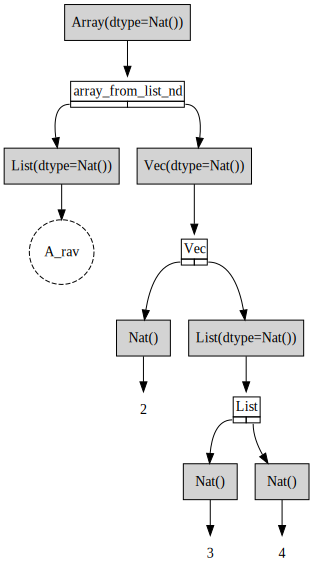

In [17]:
A

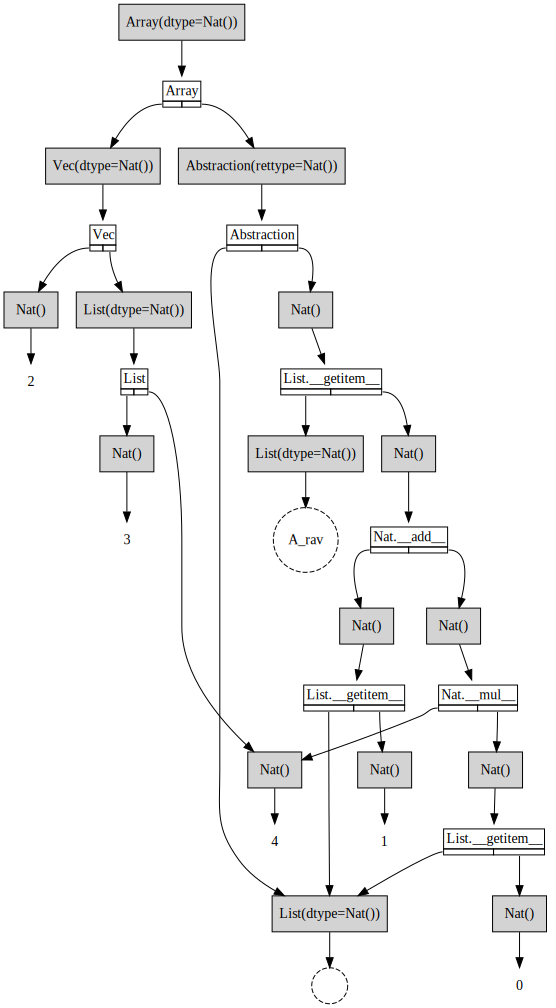

In [18]:
replace(A)

Now we can compose our exprssion:

In [19]:
expr = index(
    Array.create_1d_infer(Nat(0)),
    transpose(binary_op(A, operator.add, B))
)

In [20]:
e = svg(expr)

In [21]:
from IPython.display import SVG

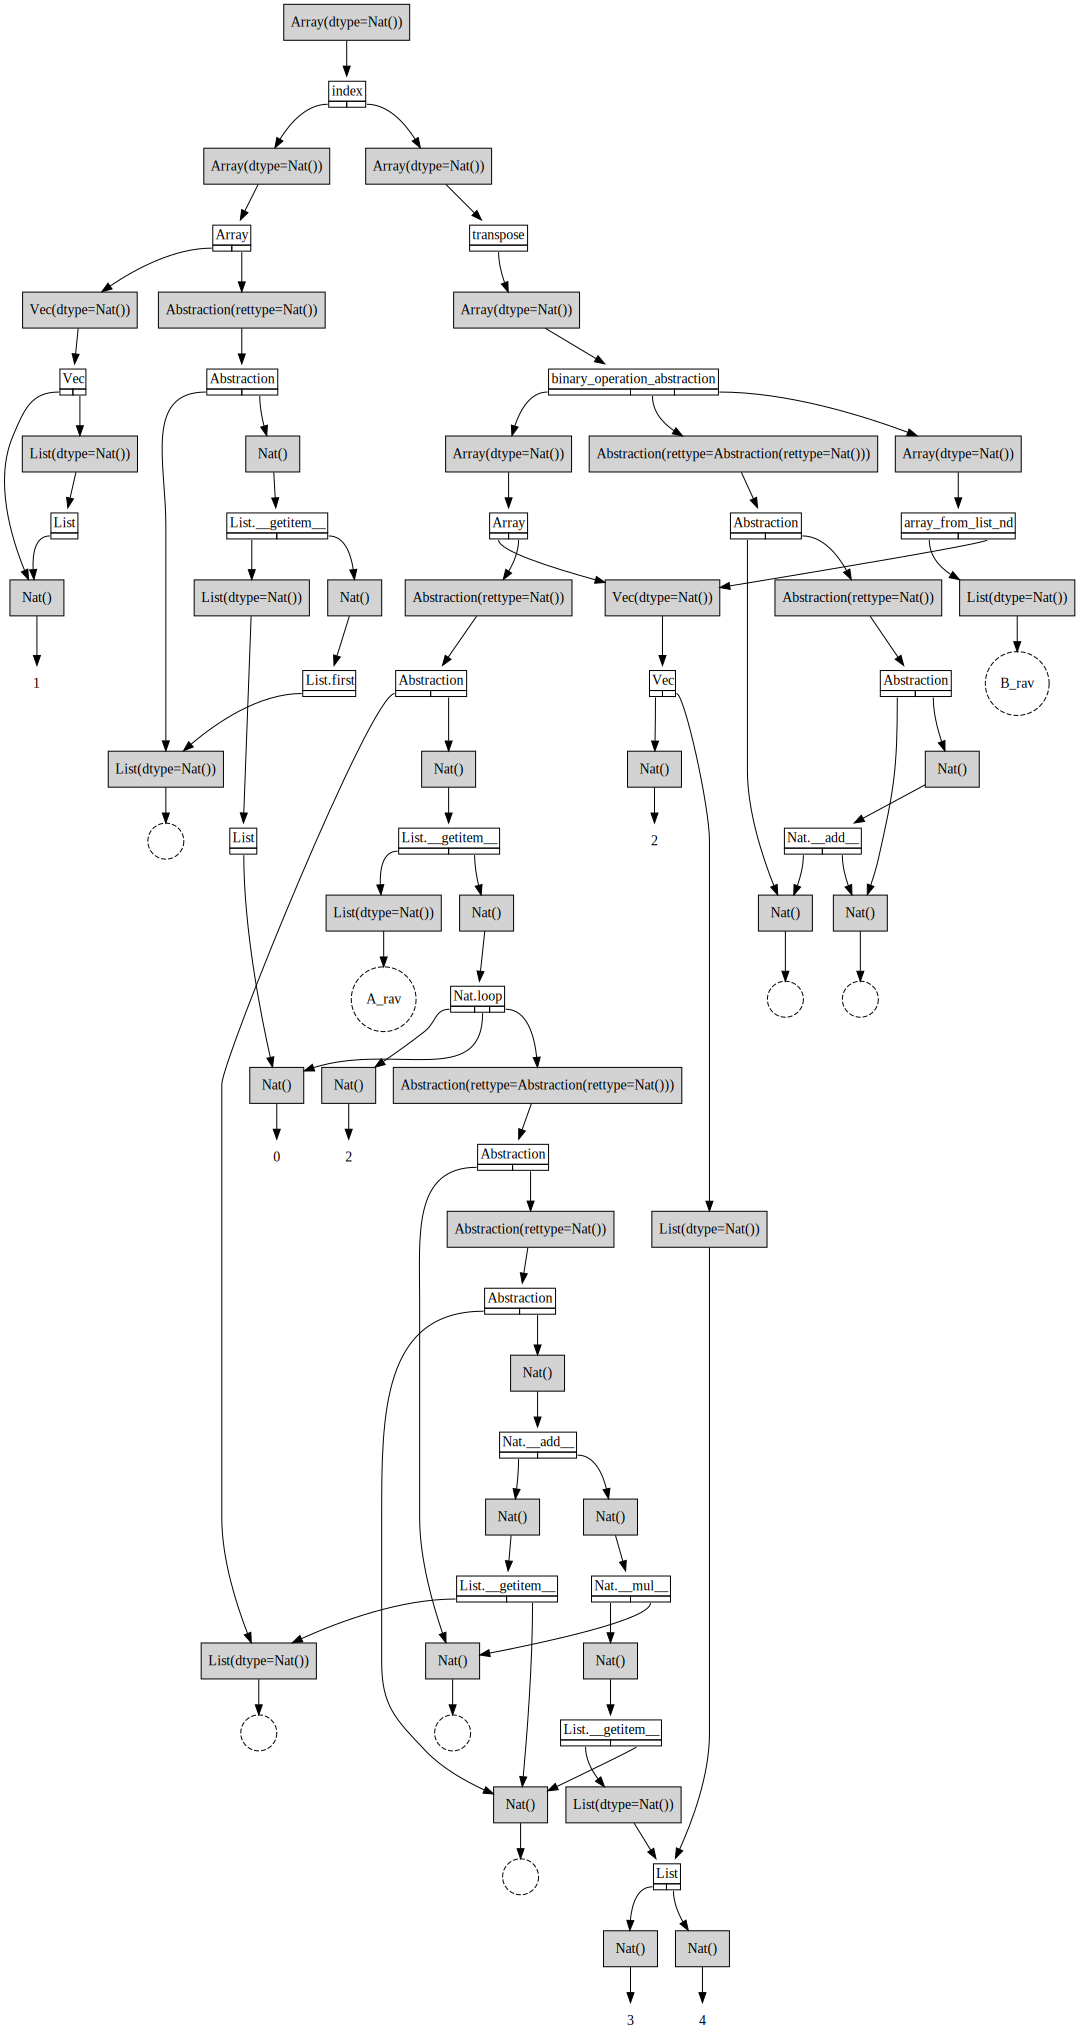

In [22]:
SVG(e)

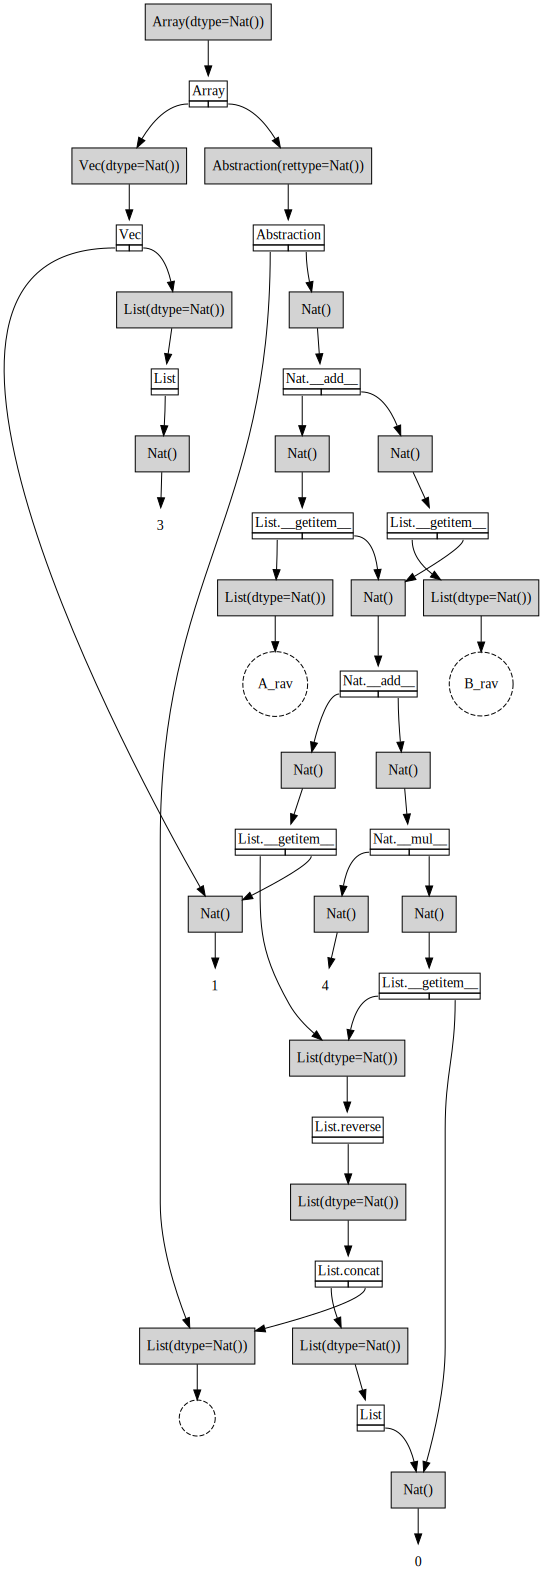

In [23]:
# NBVAL_IGNORE_OUTPUT

replace(expr)

Now we can compute it's dimensionality and verify it's correct:

In [24]:
shape = replace(expr.shape)

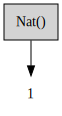

In [25]:
replace(shape.length)

Now we can access the shape to verify the first dimension is correct:

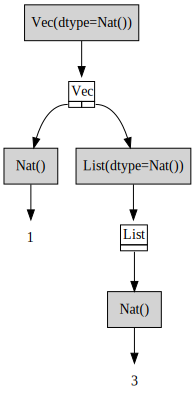

In [26]:
shape

Great!

Now let's index it with a variable `i` to see if the resulting expression is correct:

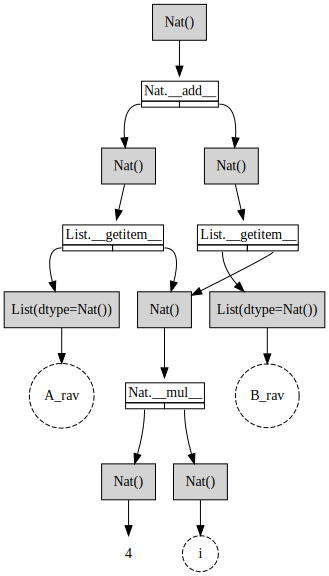

In [27]:
# NBVAL_IGNORE_OUTPUT
i = Nat(Variable('i'))
idxed = replace(expr[Array.create_idx(i)])
idxed

If we rewrite this in a bit nicer we get:

`A_rav[4 * i] + B_rav[4 * i]`
